# Single systeme 

## 1. Array manipulation using numpy

In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

In [2]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

In [4]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

## 2. Manipulation of quantum state using Qiskit

### Defining and displaying state vectors

In [6]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print(u,'\n',v,'\n',w,'\n')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,)) 
 Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],
            dims=(2,)) 
 Statevector([0.33333333+0.j, 0.66666667+0.j],
            dims=(2,)) 



<IPython.core.display.Latex object>

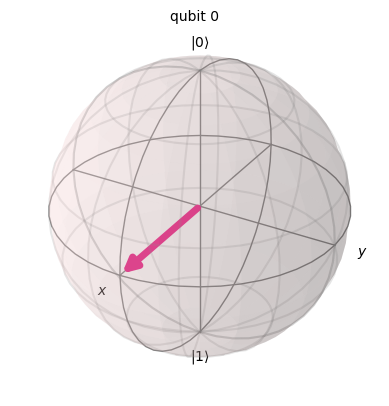

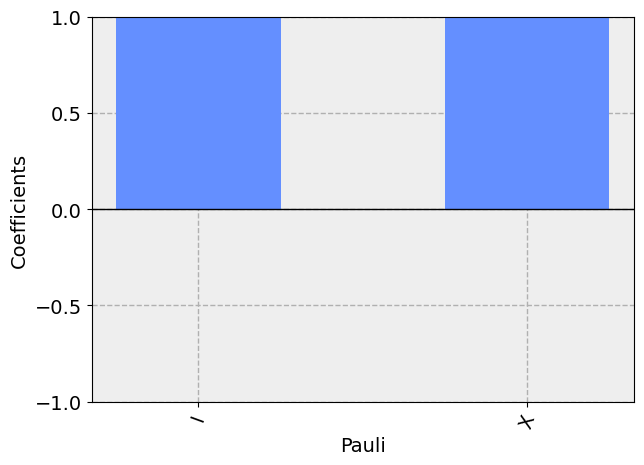

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [17]:
display(u.draw("latex"))
display(u.draw("bloch"))
display(u.draw("paulivec"))
display(u.draw("repr"))
display(u.draw("text"))

In [18]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using Statevector

In [20]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
display(v.is_valid())
v.draw("latex")

True

<IPython.core.display.Latex object>

In [21]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

{'0': 553, '1': 447}

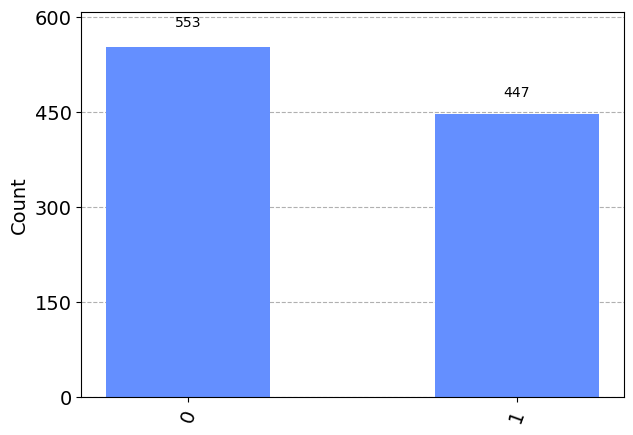

In [22]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

### Performing operations with Operator and Statevector

In [31]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

display(X.draw("latex"))
display(Y.draw("latex"))
display(Z.draw("latex"))
display(H.draw("latex"))
display(S.draw("latex"))
display(T.draw("latex"))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

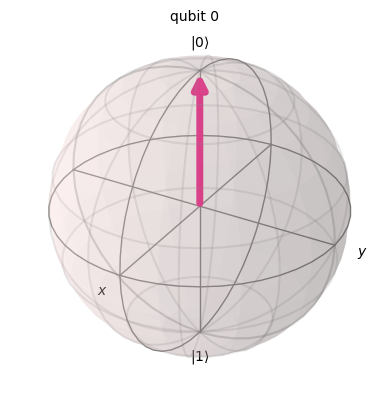

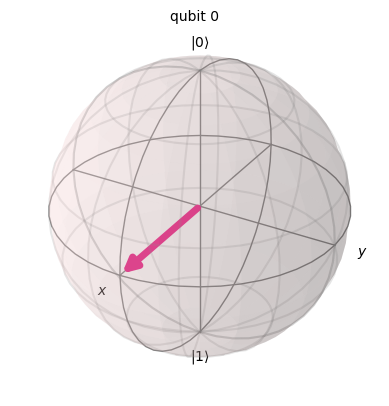

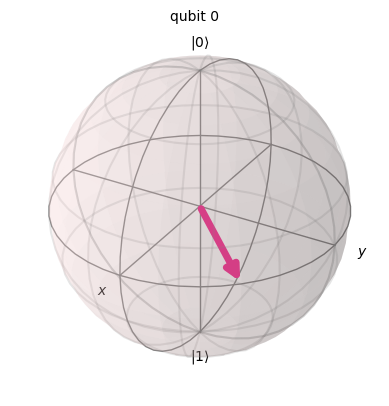

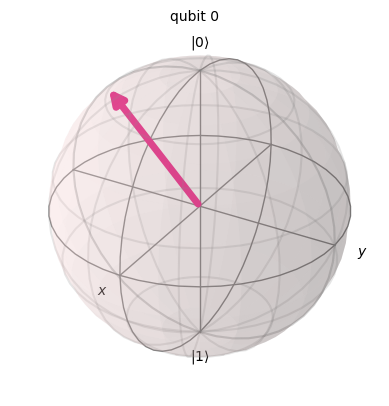

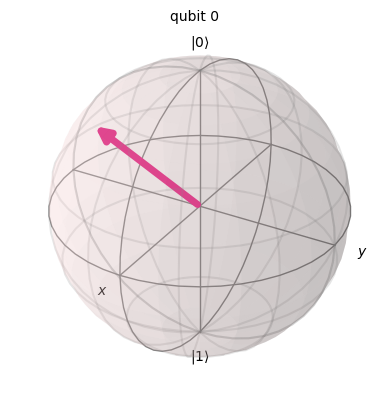

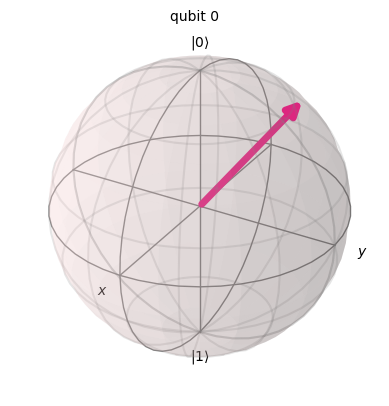

In [32]:

v = Statevector([1, 0])
display(v.draw("bloch"))
v = v.evolve(H)
display(v.draw("bloch"))
v = v.evolve(T)
display(v.draw("bloch"))
v = v.evolve(H)
display(v.draw("bloch"))
v = v.evolve(T)
display(v.draw("bloch"))
v = v.evolve(Z)
display(v.draw("bloch"))

### Looking ahead toward quantum circuits

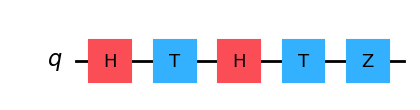

In [37]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw('mpl')

In [40]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
display(v.draw("latex"))

<IPython.core.display.Latex object>

{'0': 845, '1': 155}

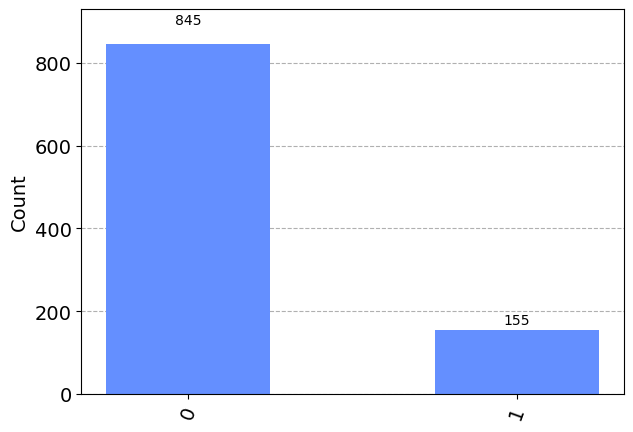

In [41]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)